In [1]:
import itertools
from myutils import Preprocessing as pre
from myutils import Datasets as ds
from myutils import Helpers 
from myutils import Complexity_Measures as cm
import numpy as np
import os
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt


#Magic Command, so changes in myutils module are reloaded
%load_ext autoreload
%autoreload 1
%aimport myutils

In [2]:
x_train, y_train, x_test, y_test = ds.ALL_NUMBERS()

# AutoEncoder

In [11]:
preprocessing_name = "Autoencoder"

for subset in [(6,9)]:

    for outputsize in [13]:

        subset_name = str(subset).replace("(","").replace(")","").replace(" ","")
            
        #log progress
        print("processing subset: {} and outputsize {}".format(subset_name,outputsize))
        os.makedirs("data/increasingFeature/{}/{}/{}".format(preprocessing_name,subset_name,outputsize),exist_ok=True)

        x_train_subset = x_train[(y_train == subset[0]) | (y_train == subset[1])]
        y_train_subset = y_train[(y_train == subset[0]) | (y_train == subset[1])]
        y_train_subset_binary = np.where(y_train_subset == subset[0], 0, y_train_subset)
        y_train_subset_binary = np.where(y_train_subset_binary == subset[1], 1, y_train_subset_binary)

        x_test_subset = x_test[(y_test == subset[0]) | (y_test == subset[1])]
        y_test_subset = y_test[(y_test == subset[0]) | (y_test == subset[1])]
        y_test_subset_binary = np.where(y_test_subset == subset[0], 0, y_test_subset)
        y_test_subset_binary = np.where(y_test_subset_binary == subset[1], 1, y_test_subset_binary)

        x_train_subset = x_train_subset.reshape(x_train_subset.shape[0],784)
        x_test_subset = x_test_subset.reshape(x_test_subset.shape[0],784)

        x_train_pre , x_test_pre, hist = pre.Autoencoder(x_train_subset,x_test_subset,outputsize=outputsize,epochs=50,verbose=1)

        for type, dataset in zip(["x_train","x_test","y_train","y_test","y_train_binary","y_test_binary","hist"],
        [x_train_pre,x_test_pre,y_train_subset,y_test_subset,y_train_subset_binary,y_test_subset_binary,hist]):


            Helpers.store(dataset,"data/increasingFeature/{}/{}/{}".format(preprocessing_name,outputsize,subset_name),type)

        tf.keras.backend.clear_session()

processing subset: 6,9 and outputsize 13
Epoch 1/50
371/371 [==============================] - 3s 6ms/step - loss: 0.1192
Epoch 2/50
371/371 [==============================] - 2s 6ms/step - loss: 0.1120
Epoch 3/50
371/371 [==============================] - 2s 6ms/step - loss: 0.1047
Epoch 4/50
371/371 [==============================] - 2s 6ms/step - loss: 0.0982
Epoch 5/50
371/371 [==============================] - 2s 6ms/step - loss: 0.0957
Epoch 6/50
371/371 [==============================] - 2s 6ms/step - loss: 0.0946
Epoch 7/50
371/371 [==============================] - 2s 6ms/step - loss: 0.0941
Epoch 8/50
371/371 [==============================] - 2s 6ms/step - loss: 0.0935
Epoch 9/50
371/371 [==============================] - 2s 6ms/step - loss: 0.0930
Epoch 10/50
371/371 [==============================] - 2s 6ms/step - loss: 0.0924
Epoch 11/50
371/371 [==============================] - 2s 5ms/step - loss: 0.0918
Epoch 12/50
371/371 [==============================] - 2s 6ms/step

# PCA

In [11]:
preprocessing_name = "PCA"

for subset in [(6,9)]:

    for outputsize in range(5,14,2):

        #mkdir
        subset_name = str(subset).replace("(","").replace(")","").replace(" ","")
        
        
        #log progress
        print("processing subset: {} and outputsize {}".format(subset_name,outputsize))

        x_train_subset = x_train[(y_train == subset[0]) | (y_train == subset[1])]
        y_train_subset = y_train[(y_train == subset[0]) | (y_train == subset[1])]
        y_train_subset_binary = np.where(y_train_subset == subset[0], 0, y_train_subset)
        y_train_subset_binary = np.where(y_train_subset_binary == subset[1], 1, y_train_subset_binary)

        x_test_subset = x_test[(y_test == subset[0]) | (y_test == subset[1])]
        y_test_subset = y_test[(y_test == subset[0]) | (y_test == subset[1])]
        y_test_subset_binary = np.where(y_test_subset == subset[0], 0, y_test_subset)
        y_test_subset_binary = np.where(y_test_subset_binary == subset[1], 1, y_test_subset_binary)

        x_train_subset = x_train_subset.reshape(x_train_subset.shape[0],784)
        x_test_subset = x_test_subset.reshape(x_test_subset.shape[0],784)

        x_train_pre , x_test_pre = pre.PCA(x_train_subset,x_test_subset,outputsize=outputsize)

        x_train_pre = pre.minmax_scaler(x_train_pre,min=0,max=1)
        x_test_pre = pre.minmax_scaler(x_test_pre,min=0,max=1)
    

        for type, dataset in zip(["x_train","x_test","y_train","y_test","y_train_binary","y_test_binary"],
        [x_train_pre,x_test_pre,y_train_subset,y_test_subset,y_train_subset_binary,y_test_subset_binary]):
            Helpers.store(dataset,"data/increasingFeature/{}/{}/{}".format(preprocessing_name,outputsize,subset_name),type)

processing subset: 6,9 and outputsize 5
processing subset: 6,9 and outputsize 7
processing subset: 6,9 and outputsize 9
processing subset: 6,9 and outputsize 11
processing subset: 6,9 and outputsize 13


In [7]:
preprocessing_name = "RAW"

os.system("rm -rf data/"+preprocessing_name+"/*")

for subset in itertools.combinations([i for i in range(10)],2):
    #mkdir
    subset_name = str(subset).replace("(","").replace(")","").replace(" ","")
    
    os.makedirs("data/{}/{}".format(preprocessing_name,subset_name))
    
    #log progress
    print("processing subset:",subset_name)

    x_train_subset = x_train[(y_train == subset[0]) | (y_train == subset[1])]
    y_train_subset = y_train[(y_train == subset[0]) | (y_train == subset[1])]

    y_train_subset_binary = np.where(y_train_subset == subset[0], 0, y_train_subset)
    y_train_subset_binary = np.where(y_train_subset_binary == subset[1], 1, y_train_subset_binary)

    x_test_subset = x_test[(y_test == subset[0]) | (y_test == subset[1])]
    y_test_subset = y_test[(y_test == subset[0]) | (y_test == subset[1])]
    y_test_subset_binary = np.where(y_test_subset == subset[0], 0, y_test_subset)
    y_test_subset_binary = np.where(y_test_subset_binary == subset[1], 1, y_test_subset_binary)

    x_train_subset = x_train_subset.reshape(x_train_subset.shape[0],784)
    x_test_subset = x_test_subset.reshape(x_test_subset.shape[0],784)

    for type, dataset in zip(
        ["x_train","x_test","y_train","y_test","y_train_binary","y_test_binary"],
        [x_train_subset,x_test_subset,y_train_subset,y_test_subset,y_train_subset_binary,y_test_subset_binary]):

        np.save("data/"+preprocessing_name+"/"+str(subset_name)+"/"+type+".npy",dataset)

processing subset: 0,1
processing subset: 0,2
processing subset: 0,3
processing subset: 0,4
processing subset: 0,5
processing subset: 0,6
processing subset: 0,7
processing subset: 0,8
processing subset: 0,9
processing subset: 1,2
processing subset: 1,3
processing subset: 1,4
processing subset: 1,5
processing subset: 1,6
processing subset: 1,7
processing subset: 1,8
processing subset: 1,9
processing subset: 2,3
processing subset: 2,4
processing subset: 2,5
processing subset: 2,6
processing subset: 2,7
processing subset: 2,8
processing subset: 2,9
processing subset: 3,4
processing subset: 3,5
processing subset: 3,6
processing subset: 3,7
processing subset: 3,8
processing subset: 3,9
processing subset: 4,5
processing subset: 4,6
processing subset: 4,7
processing subset: 4,8
processing subset: 4,9
processing subset: 5,6
processing subset: 5,7
processing subset: 5,8
processing subset: 5,9
processing subset: 6,7
processing subset: 6,8
processing subset: 6,9
processing subset: 7,8
processing 

In [2]:
x_train, y_train, x_test, y_test = ds.ALL_NUMBERS()

In [143]:
subset_name = "0,6"
subset = (0,6)
preprocessing_name ="Autoencoder_small" 

#log progress
print("processing subset:",subset_name)

x_train_subset = x_train[(y_train == subset[0]) | (y_train == subset[1])]
y_train_subset = y_train[(y_train == subset[0]) | (y_train == subset[1])]
y_train_subset_binary = np.where(y_train_subset == subset[0], 0, y_train_subset)
y_train_subset_binary = np.where(y_train_subset_binary == subset[1], 1, y_train_subset_binary)

x_test_subset = x_test[(y_test == subset[0]) | (y_test == subset[1])]
y_test_subset = y_test[(y_test == subset[0]) | (y_test == subset[1])]
y_test_subset_binary = np.where(y_test_subset == subset[0], 0, y_test_subset)
y_test_subset_binary = np.where(y_test_subset_binary == subset[1], 1, y_test_subset_binary)

x_train_subset = x_train_subset.reshape(x_train_subset.shape[0],784)
x_test_subset = x_test_subset.reshape(x_test_subset.shape[0],784)

x_train_pre , x_test_pre, hist = pre.Autoencoder(x_train_subset,x_test_subset,outputsize=4,epochs=15)

for type, dataset in zip(["x_train","x_test","y_train","y_test","y_train_binary","y_test_binary","hist"],
[x_train_pre,x_test_pre,y_train_subset,y_test_subset,y_train_subset_binary,y_test_subset_binary,hist]):


    Helpers.store(dataset,"data/{}/{}".format(preprocessing_name,subset_name),type)

tf.keras.backend.clear_session()

processing subset: 0,6


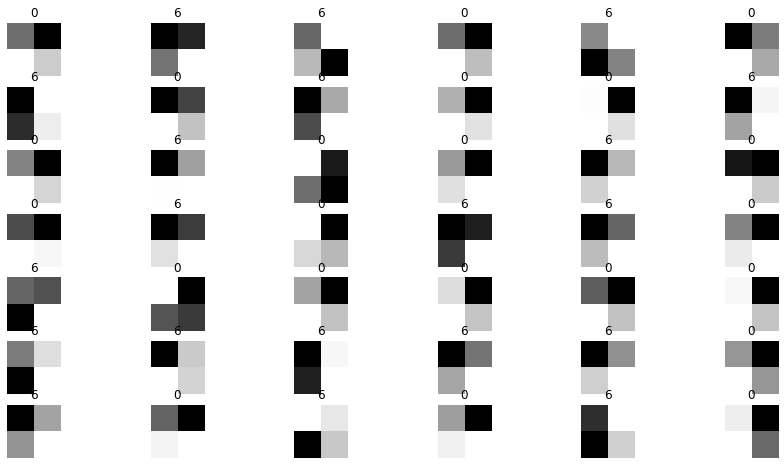

In [144]:
data = ds.get_preprocessed_datasets("Autoencoder_small")["Autoencoder_small"]["0,6"]
Helpers.plot_grid(data["x_train"],data["y_train"],rows=7,cols=6)